## **Perceptron Algorithm**

**Read Dataset**

In [1]:
# import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xlsx = pd.ExcelFile('DataForPerceptron.xlsx')
train_data = pd.read_excel(xlsx, 'TRAINData')
test_data = pd.read_excel(xlsx, 'TESTData')

**Split train and test data**

In [3]:
x_train = train_data.drop(['SubjectID', 'Class'], axis=1)
x_train['Attr10'] = 1 # add 1 to end of all train data

y_train = train_data['Class']

x_test = test_data.drop(['SubjectID', 'Class'], axis=1)

**Define variables like w and learning rate**

In [4]:
w = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
alpha = 1

**Define helper functions**

In [5]:
def matrixCarpimi(w, matrix): return [w[i]*matrix[i] for i in range(len(w))]
def matrixToplami(w, matrix): return [w[i]+matrix[i] for i in range(len(w))]
def matrixCikarimi(w, matrix): return [w[i]-matrix[i] for i in range(len(w))]
def predict(w,x): return 2 if sum(matrixCarpimi(w, x)) <= 0 else 4
def accuracy(w):
    prediction_list = [2 if prediction <= 2 else 4 for prediction in [sum(matrixCarpimi(w,values)) for values in x_train.values]]
    accuracy_score = sum([100 / x_train.shape[0] if y_train.values[i] == prediction_list[i] else 0 for i in range(len(prediction_list))])
    return accuracy_score

**Fit and check results**

Epoch: 1 --- Accuracy Score: 84.00000000000036
Epoch: 2 --- Accuracy Score: 67.27272727272715
Epoch: 3 --- Accuracy Score: 88.54545454545503
Epoch: 4 --- Accuracy Score: 77.818181818182
Epoch: 5 --- Accuracy Score: 94.36363636363701
Epoch: 6 --- Accuracy Score: 88.54545454545503
Epoch: 7 --- Accuracy Score: 70.36363636363633
Epoch: 8 --- Accuracy Score: 95.09090909090976
Epoch: 9 --- Accuracy Score: 82.72727272727305
Epoch: 10 --- Accuracy Score: 96.0000000000007
Epoch: 11 --- Accuracy Score: 88.36363636363684
Epoch: 12 --- Accuracy Score: 96.36363636363707
Epoch: 13 --- Accuracy Score: 93.45454545454608
Epoch: 14 --- Accuracy Score: 87.45454545454591
Epoch: 15 --- Accuracy Score: 95.63636363636432
Epoch: 16 --- Accuracy Score: 94.72727272727339
Epoch: 17 --- Accuracy Score: 90.18181818181871
Epoch: 18 --- Accuracy Score: 93.0909090909097
Epoch: 19 --- Accuracy Score: 93.81818181818245
Epoch: 20 --- Accuracy Score: 91.27272727272783
Epoch: 21 --- Accuracy Score: 93.0909090909097
Epoch:

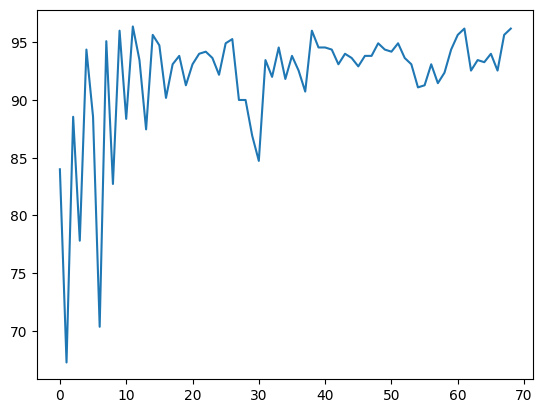

In [6]:
epochs = 0
acc = []

while True:
    epochs += 1
    m = 0
    for i in range(len(x_train.values)):
        wt = matrixCarpimi(w, x_train.values[i])
        if y_train.values[i] == 4 and sum(wt) <= 0:
            w = matrixToplami(w, np.multiply(x_train.values[i], alpha))
            m += 1
        elif y_train.values[i] == 2 and sum(wt) >= 0:
            w = matrixCikarimi(w, np.multiply(x_train.values[i], alpha))
            m -= 1
        else:
            continue

    print("Epoch: "+str(epochs)+" --- Accuracy Score: "+str(accuracy(w)))
    acc.append(accuracy(w))

    if m == 0:
        break

plt.plot(range(epochs),acc)

In [7]:
# acc = []

# for iteration in range(100):
#     for i in range(len(x_train.values)):
#         wt = matrixCarpimi(w, x_train.values[i])
#         if y_train.values[i] == 4 and sum(wt) <= 0:
#             w = matrixToplami(w, np.multiply(x_train.values[i], alpha))
#         elif y_train.values[i] == 2 and sum(wt) >= 0:
#             w = matrixCikarimi(w, np.multiply(x_train.values[i], alpha))
#         else:
#             continue
    
#     print("Iteration: "+str(iteration)+" --- Accuracy Score: "+str(accuracy(w)))
#     acc.append(accuracy(w))

# plt.plot(range(100),acc)

In [8]:
w

[25, 29, 12, 6, -5, 7, 5, 4, 6, -326]

**Evulate Test Data**

In [9]:
x_test['Attr10'] = 1 # add 1 to end of all test data

In [10]:
y_test = [predict(w,values) for values in x_test.values]

In [11]:
test_data['Class'] = y_test

**Write Evulation Result To Excel File**

In [12]:
# :)